## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## importing the dataset

In [2]:
titanic_df = pd.read_csv('Titanic-Dataset.csv')

## Data Exploration

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Age, Cabin and Embarked columns contains null values

In [8]:
round((titanic_df['Age'].isnull().sum()/len(titanic_df))*100,2)

19.87

In [9]:
round((titanic_df['Cabin'].isnull().sum()/len(titanic_df))*100,2)

77.1

In [10]:
round((titanic_df['Embarked'].isnull().sum()/len(titanic_df))*100,2)

0.22

## We will drop Cabin column and 2 records where Embarked is empty and we will impute the age column

In [11]:
titanic_df.drop('Cabin', axis = 1, inplace = True)

In [12]:
titanic_df.dropna(subset = ['Embarked'], inplace = True)

In [13]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)

In [14]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Our dataset is clean

## Now we don't need PassengerId, Ticket, Name column for our analysis

In [15]:
titanic_df.drop(columns = ['PassengerId', 'Ticket', 'Name'], inplace = True, index = 1)

In [16]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
titanic_df['Pclass'].unique()

array([3, 1, 2])

In [18]:
titanic_df['Embarked'].unique()

array(['S', 'Q', 'C'], dtype=object)

In [19]:
titanic_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [20]:
titanic_df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

## We will check how many passenger survived with visualization

<Axes: xlabel='Survived', ylabel='count'>

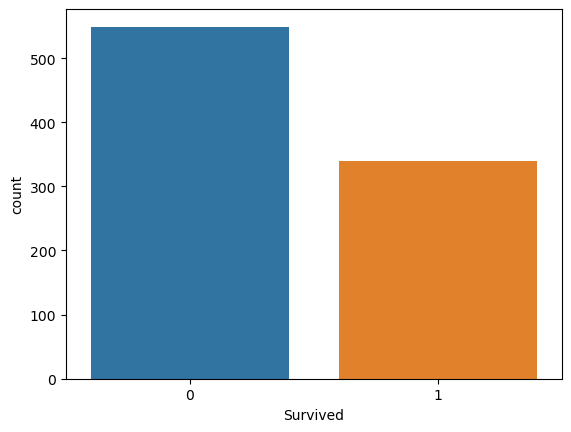

In [21]:
sns.countplot(x = 'Survived', data = titanic_df)

## We will check which parameter affects the survival stats

<Axes: xlabel='Survived', ylabel='count'>

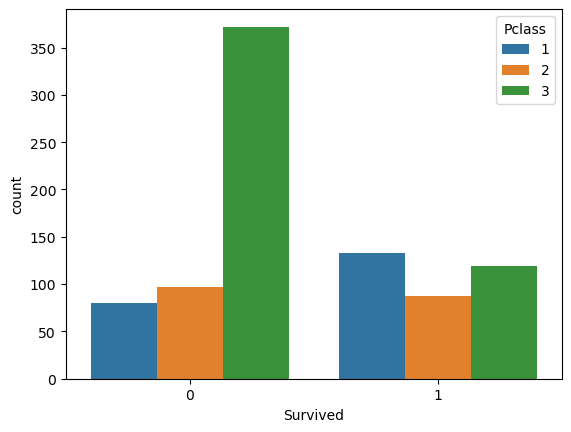

In [22]:
sns.countplot(x = 'Survived', data = titanic_df, hue = 'Pclass')

<Axes: xlabel='Survived', ylabel='count'>

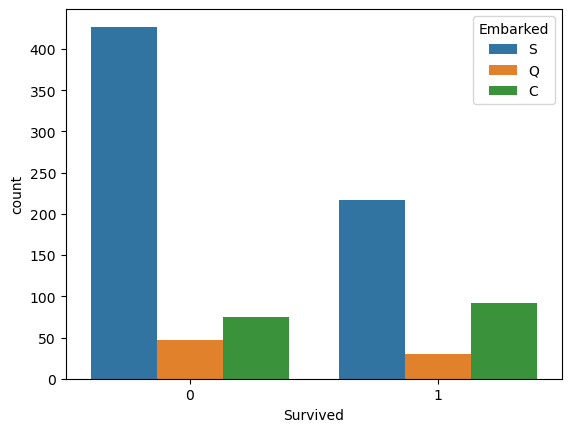

In [23]:
sns.countplot(x = 'Survived', data = titanic_df, hue = 'Embarked')

<Axes: xlabel='Survived', ylabel='count'>

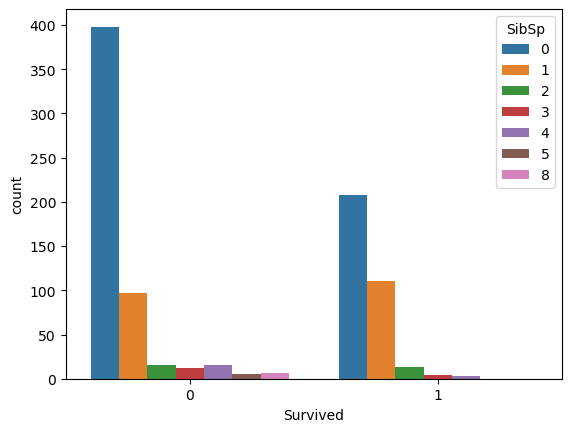

In [24]:
sns.countplot(x = 'Survived', data = titanic_df, hue = 'SibSp')

<Axes: xlabel='Survived', ylabel='count'>

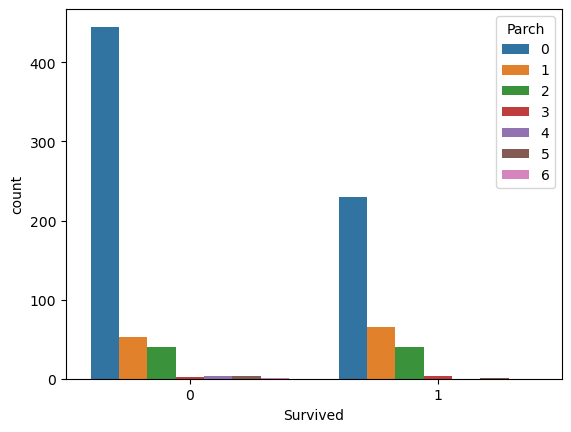

In [25]:
sns.countplot(x = 'Survived', data = titanic_df, hue = 'Parch')

## Based on the graphs above we can say that Survival of a person is not based on Parch, SibSp and Embarked. because both the columns are the same; hence we will drop those columns

In [26]:
titanic_df.drop(columns = ['Parch', 'SibSp', 'Embarked'], inplace = True)

In [27]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [28]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
5,0,3,male,29.642093,8.4583


In [29]:
titanic_df['Sex'].replace(['male', 'female'], [0,1], inplace = True)

In [30]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.000000,7.2500
2,1,3,1,26.000000,7.9250
3,1,1,1,35.000000,53.1000
4,0,3,0,35.000000,8.0500
5,0,3,0,29.642093,8.4583


In [31]:
Pclass_dummies = pd.get_dummies(titanic_df['Pclass'], drop_first = True)

In [32]:
titanic_df = pd.concat([titanic_df, Pclass_dummies], axis = 1)

In [33]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,2,3
0,0,3,0,22.000000,7.2500,False,True
2,1,3,1,26.000000,7.9250,False,True
3,1,1,1,35.000000,53.1000,False,False
4,0,3,0,35.000000,8.0500,False,True
5,0,3,0,29.642093,8.4583,False,True


In [34]:
titanic_df.drop('Pclass', axis = 1, inplace = True)

In [35]:
columns = ['Survived', 'Sex', 'Age', 'Fare', 'Pclass_2', 'Pclass_3']

In [36]:
titanic_df.columns = columns

In [37]:
titanic_df.head()

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3
0,0,0,22.000000,7.2500,False,True
2,1,1,26.000000,7.9250,False,True
3,1,1,35.000000,53.1000,False,False
4,0,0,35.000000,8.0500,False,True
5,0,0,29.642093,8.4583,False,True


In [38]:
titanic_df['Pclass_2'].replace([True, False], [1,0], inplace = True)

In [39]:
titanic_df['Pclass_3'].replace([True, False], [1,0], inplace = True)

In [40]:
titanic_df.head()

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3
0,0,0,22.000000,7.2500,0,1
2,1,1,26.000000,7.9250,0,1
3,1,1,35.000000,53.1000,0,0
4,0,0,35.000000,8.0500,0,1
5,0,0,29.642093,8.4583,0,1


## Extract the target and independent variables

In [41]:
y = titanic_df['Survived']

In [42]:
X = titanic_df[['Sex', 'Age', 'Fare', 'Pclass_2', 'Pclass_3']]

## Now all of our data is neat and clean; now we will split the dataset for training and testing

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [45]:
X_train.shape

(621, 5)

## Now Age and Fare are in different units so we will scale those two columns

(array([ 54.,  46., 177., 346., 116.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

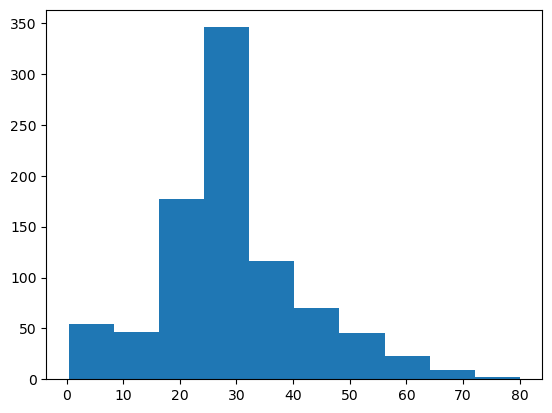

In [46]:
plt.hist(titanic_df['Age'])

(array([732., 103.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

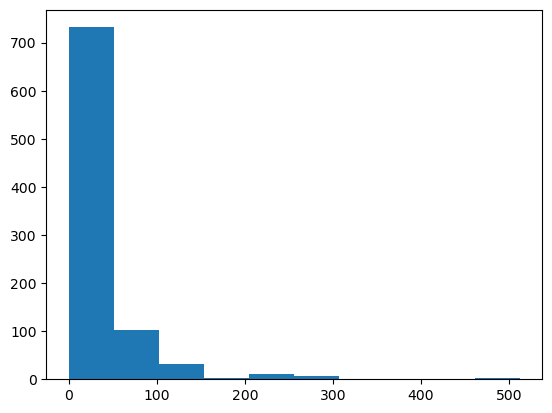

In [47]:
plt.hist(titanic_df['Fare'])

## Now we will standardize the Age and Fare variables for the training dataset

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
age = scaler.fit_transform(X_train[['Age']])

In [51]:
age_df = pd.DataFrame(age)

In [52]:
X_train = pd.concat([X_train, age_df], axis = 1)

In [53]:
X_train.head()

,Sex,Age,Fare,Pclass_2,Pclass_3,0
487,0.0,58.000000,29.7000,0.0,0.0,-1.030971
294,0.0,24.000000,7.8958,0.0,1.0,-0.876085
174,0.0,56.000000,30.6958,0.0,0.0,0.208115
451,0.0,29.642093,19.9667,0.0,1.0,0.053229
362,1.0,45.000000,14.4542,0.0,1.0,0.025512


In [54]:
X_train.drop('Age', axis = 1, inplace = True)

In [55]:
X_train.head()

,Sex,Fare,Pclass_2,Pclass_3,0
487,0.0,29.7000,0.0,0.0,-1.030971
294,0.0,7.8958,0.0,1.0,-0.876085
174,0.0,30.6958,0.0,0.0,0.208115
451,0.0,19.9667,0.0,1.0,0.053229
362,1.0,14.4542,0.0,1.0,0.025512


In [56]:
fare = age = scaler.fit_transform(X_train[['Fare']])

In [57]:
fare_df = pd.DataFrame(fare)

In [58]:
X_train = pd.concat([X_train, fare_df], axis = 1)

In [48]:
X_train.head()

,Sex,Age,Fare,Pclass_2,Pclass_3
487,0,58.000000,29.7000,0,0
294,0,24.000000,7.8958,0,1
174,0,56.000000,30.6958,0,0
451,0,29.642093,19.9667,0,1
362,1,45.000000,14.4542,0,1


In [60]:
X_train.drop('Fare', axis = 1, inplace = True)

In [61]:
columns = ['Sex', 'Pclass_2', 'Pclass_3', 'Age', 'Fare']

In [62]:
X_train.columns = columns

In [49]:
X_train.head()

,Sex,Age,Fare,Pclass_2,Pclass_3
487,0,58.000000,29.7000,0,0
294,0,24.000000,7.8958,0,1
174,0,56.000000,30.6958,0,0
451,0,29.642093,19.9667,0,1
362,1,45.000000,14.4542,0,1


## Now we will standardize the Age and Fare variables for the test dataset

In [64]:
X_test['Age'] = scaler.fit(X_test[['Age']])

In [65]:
X_test['Fare'] = scaler.fit(X_test[['Fare']])

## Now we will train our model on training dataset

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(X_train,y_train)

LogisticRegression()

## Now we will predict for the test dataset

In [53]:
y_pred = lr.predict(X_test)

## Now we will check for the accuracy of the model 

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy = accuracy_score( y_test, y_pred)

In [56]:
round(accuracy*100,2)

79.4

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],      # Type of regularization
    'solver': ['liblinear']       # Solver compatible with l1 penalty
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [59]:
# Fit the grid search model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [60]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}


In [61]:
# Use the best estimator to make predictions
y_predict = grid_search.predict(X_test)

In [62]:
# Evaluate the best model after hyperparameter tuning
accuracy = accuracy_score(y_test, y_predict)
print("Tuned Accuracy:", accuracy)

Tuned Accuracy: 0.7865168539325843
